## Social Preformance Estimator // A walk-through
### Author: Greta Perez-Haiek || As part of ML Engineering @ Rensselaer Polytechnic Institute

## Creating the dataset...

The purpose of this python file is to extract the feature vectors from the .jpg images extracted from my instagram profile.

In the Github, the "Images (jpg)" folder under the "Data" folder contains 185 .jpg images that needs extracting: if you would like to use your own images, feel free to replace the images in this file with your own with a numerical naming conjunction of "1.jpg, 2.jpg, 3.jpg ... "n".jpg" where "n" is the number of total images that you will train/test the model upon. The purpose of this python file is to extract the feature vectors from the .jpg images in "Images (jpg)".

Note: If you are interested in replacing the images with your own data, please make sure to also replace the data written in the "y_likes_data.txt" file with the number of likes corresponding to each image with the following conjunction: 

1: [1.jpg's likes]

2: [2.jpg's likes]

...

"n": ["n".jpg's likes]

where "n" is the number of total images that you will train/test the model upon. Make sure that each conjunction is in it's own line in the .txt file! If you need an example, feel free to glance the "y_likes_data.txt" file that is currently present.

In [11]:
'''Assuming that the "y_likes_data.txt" and "Images (jpg)" folder is constructed correctly...
It's time to extract the features in each .jpg file, then store them in the "X_feature_vector_data.txt" file!
This file, along with "y_likes_data.txt", will used in the "Training Model" python file for machine learning purposes! '''

import matplotlib.pyplot as plt
import numpy as np
import cv2

#import "y" data
y = np.loadtxt("Data/y_likes_data.txt", comments='#', delimiter=":") #y[:, 0] = jpg number, #y[:, 1] = likes!
X = [] #creates empty numpy array

#Extracts data from Images folder then appends to X variable
for i in range(y[:, 1].size):
    image = cv2.imread("Data/Images (jpg)/" + str(i+1) + ".jpg") #imports image
    target_size = (64, 64)
    image = cv2.resize(image, target_size) #resizes image
    image = np.array(image) #Converts image to an numpy array
    image = image.flatten() #converts numpy array to a 1D array
    X.append(image) #appends it to X
X = np.array(X) #converts X into numpy array
np.savetxt("Data/X_feature_vector_data.txt", X)#imports X variable into the "X_feature_vector_data.txt" file


Run this python file (with the images in it's correct folder) to get y and X data!
To help properly vizualize the data, consider the following code...

Data Visualization!

The first couple of y values are...
[ 1. 27.] likes
[ 2. 18.] likes
[ 3. 16.] likes
...
[185. 150.] likes

The 1st image looks like...


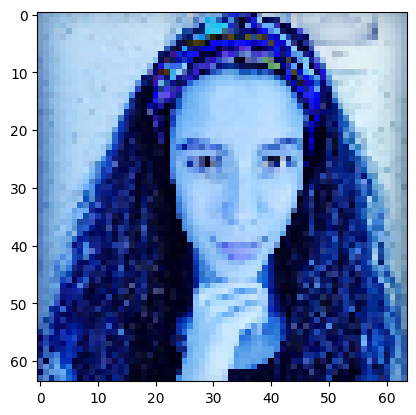


The feature vector array of this image is...
[114 152 194 ...  62 113 177]

Lets visualize how balanced our dataset is... 

While the dataset could be more balanced, it encasulates an 'ok' variety...


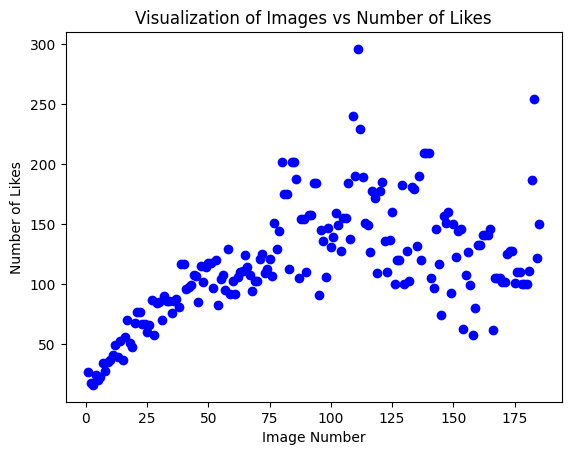

In [12]:
print("Data Visualization!")
print()
print("The first couple of y values are...")
print(y[0, :], "likes")
print(y[1, :], "likes")
print(y[2, :], "likes")
print("...")
print(y[y[:, 1].size - 1, :], "likes")
print()
print("The 1st image looks like...")
image = cv2.imread("Data/Images (jpg)/1.jpg")
target_size = (64, 64)
image = cv2.resize(image, target_size) #resizes image to 64 x 64... this maintains consistency!
plt.imshow(image)
plt.show()
print()
print("The feature vector array of this image is...")
image = np.array(image) #Converts image to an numpy array
image = image.flatten() #converts numpy array to a 1D array
print(image)

import matplotlib.pyplot as plt
print()
print("Lets visualize how balanced our dataset is... ")
plt.plot(y[:,0], y[:,1], 'bo')
plt.xlabel('Image Number')
plt.ylabel('Number of Likes')
plt.title('Visualization of Images vs Number of Likes')
print()
print("While the dataset could be more balanced, it encasulates an 'ok' variety...")

The following are a sample of the images that are part of the dataset...


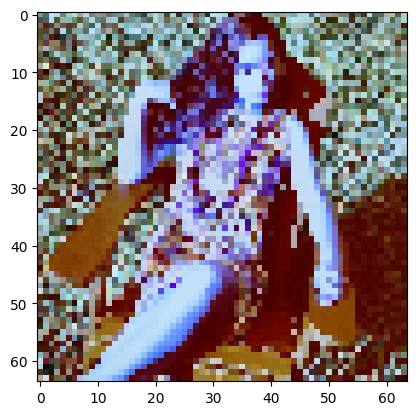

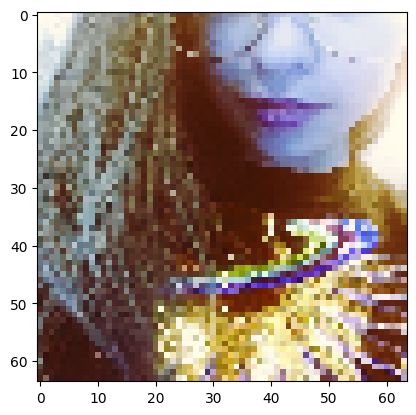

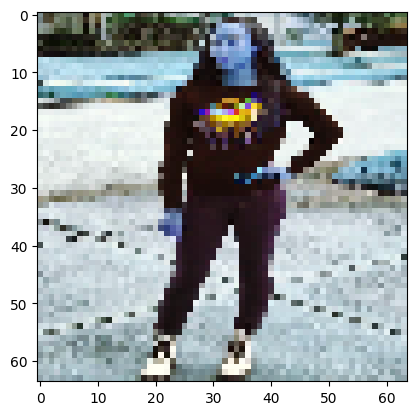

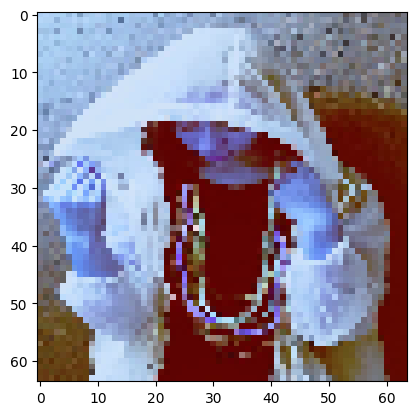

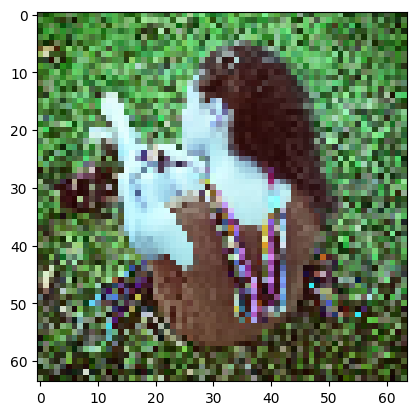

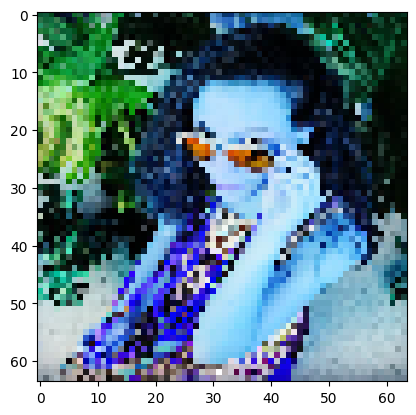

In [13]:
#DATA VISUALIZATIONS!!!
print("The following are a sample of the images that are part of the dataset...")

image = cv2.imread("Data/Images (jpg)/2.jpg")
target_size = (64, 64)
image = cv2.resize(image, target_size) #resizes image to 64 x 64... this maintains consistency!
plt.imshow(image)
plt.show()
image = cv2.imread("Data/Images (jpg)/3.jpg")
target_size = (64, 64)
image = cv2.resize(image, target_size) #resizes image to 64 x 64... this maintains consistency!
plt.imshow(image)
plt.show()
image = cv2.imread("Data/Images (jpg)/4.jpg")
target_size = (64, 64)
image = cv2.resize(image, target_size) #resizes image to 64 x 64... this maintains consistency!
plt.imshow(image)
plt.show()
image = cv2.imread("Data/Images (jpg)/5.jpg")
target_size = (64, 64)
image = cv2.resize(image, target_size) #resizes image to 64 x 64... this maintains consistency!
plt.imshow(image)
plt.show()
image = cv2.imread("Data/Images (jpg)/6.jpg")
target_size = (64, 64)
image = cv2.resize(image, target_size) #resizes image to 64 x 64... this maintains consistency!
plt.imshow(image)
plt.show()
image = cv2.imread("Data/Images (jpg)/7.jpg")
target_size = (64, 64)
image = cv2.resize(image, target_size) #resizes image to 64 x 64... this maintains consistency!
plt.imshow(image)
plt.show()

Note that most (if not all) of the images in this dataset pictures of me in one way or another, may it be selfies or close-ups. This method also utilizes image segmentation to highlight important features (for example, in the last most recent image, my glasses are lit up in bright orange as an example). The color value and pixel count are important features that the model will take into account when analyzing each image. 

Congrats! Now we're ready to design, train, and validate our future machine learning model!

## Creating and Training the Model

The purpose of this python file is to create a CNN regression architecture and train it upon the data ("X_feature_vector_data.txt" and "y_likes_data.txt" files) wrangled from "Creating Dataset" section of this file. CNN regression, after consulting the literature review contained in the "literature Review" folder, is deemed to be the best way to predict the number of "likes" from abstract image data.

First, data stored in the text files will be imported as X and y variables. For this model, we are using a 80/20 validation split to train and test the data. This means that approximately 80% of the data will be used for training purposes, and 20% of the data will be used for validation purposes. Each image data is segmented into two feature vectors: the pixel strength, and the RGB color value associated with each pixel. 

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

#Loads data from textfiles!
y = np.loadtxt("Data/y_likes_data.txt", comments='#', delimiter=":") #y[:, 0] = jpg number, #y[:, 1] = likes!
X = [] #creates empty numpy array

#Extracts data from Images folder then appends to X variable
for i in range(y[:, 1].size):
    image = plt.imread("Data/Images (jpg)/" +str(i+1) + ".jpg") #imports image
    target_size = (64, 64)
    image = cv2.resize(image, target_size) #resizes image
    image = np.array(image) #Converts image to an numpy array
    X.append(image) #appends it to X
X = np.array(X) #converts X into numpy array

#Normalize the image data
X_normalized = X / 255.0

#create testing and training sets!
X_train, X_val, Y_train, Y_val = train_test_split(X_normalized, y, test_size=0.2, random_state=0)
print("Success! Data properly split!")
print("Size of training data is...", X_train[:,1].shape)
print("where 148 represent the number of images, 64 represent the total pixes, and 3 represents the color values.")
print("Size of testing data is...", X_val[:,1].shape)
print("where 37 represent the number of images, 64 represent the total pixes, and 3 represents the color values.")

Success! Data properly split!
Size of training data is... (148, 64, 3)
where 148 represent the number of images, 64 represent the total pixes, and 3 represents the color values.
Size of testing data is... (37, 64, 3)
where 37 represent the number of images, 64 represent the total pixes, and 3 represents the color values.


We will also be using Tensorflow Keras to create our neural network. The following neural network model to be used is a Convolutional Neural Network (CNN), specifically, a regression type. With reference to the various literature data, Convolutional Neural Networks are commonly used in computer vision applications and are an excellent way to make predictions based on image data alone. Regression models are known to scale testing data against training data, and then estiamte where the testing data occurs on the training data trends (and what their associated target value will be). Specifically, CNN architecture is designed for computer vision applications, while other regressiors such as K-Means would suffer from the curse of dimensionality when applied to the same challenge.

The specific CNN Architecture we will use is (very loosely) inspired by Google's Inception-v3 AI (see Literature Review for PDF of the paper). Of course, implimenting the entire AI model architecture would be complicated and (frankly) "over-kill" for the type of challenge at hand. Nevertheless, the inspiration of layering a unique (self-designed) set of "Covolutional Layers,"Max pooling" layers, "Dense", "Flatten", and "Drop out layers" comes from Inception-V3's complex (but elegant) architecture thats commonly found in advanced CNNs. The use of these specific layers will be used in my own architecture in my own simplified model, though I did not copy the order (or the included hyperparameters) at which these layers appear.

In [16]:
tf.keras.backend.clear_session() #clears model every reload

model = Sequential() 
model.add(Conv2D(32, (3,3), activation='relu',data_format = "channels_last", input_shape = (X_train.shape[1:]))) 
model.add(MaxPooling2D(pool_size=(2, 2))) #max pooling layer of size (2, 2)
model.add(Conv2D(64, (3,3), activation='relu', input_shape= X_train.shape[1:])) 
model.add(MaxPooling2D(pool_size=(2, 2))) #max pooling layer of size (2, 2)
model.add(Flatten()) #Flatten layer --> convert to 1D vector
model.add(Dense(128, activation='relu')) #Dense layer with 128 neurons and uses the ReLU activation
model.add(Dropout(rate = 0.2)) #drop 20% of the features out of the image...
model.add(Dense(1, activation='linear')) #produces number of estimated "likes"!!

model.summary() #prints out the summary of the model for visualization purposes...

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1

The CNN is constructed... hooray! Now, lets use ADAM to optimize the model, and compile it with accordance to a loss approach of Mean Squared Error. Mean Squared Error is a way to measure the error between the truth value of a target verses the predicted result generated from the Model. As the problem is a regression-type, the goal of the model is to tune itself so that the MSE generated between it's predictions and the validation data would be minimized over time. 

In [17]:
# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model and save the history
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_val, Y_val),verbose=1)

Epoch 1/50
5/5 [==============================] - 1s 107ms/step - loss: 11030.0195 - val_loss: 6040.7915
Epoch 2/50
5/5 [==============================] - 0s 69ms/step - loss: 4501.7632 - val_loss: 4705.0020
Epoch 3/50
5/5 [==============================] - 0s 68ms/step - loss: 3896.4780 - val_loss: 5751.7065
Epoch 4/50
5/5 [==============================] - 0s 68ms/step - loss: 3964.4814 - val_loss: 4655.0391
Epoch 5/50
5/5 [==============================] - 0s 67ms/step - loss: 3474.3894 - val_loss: 4408.7393
Epoch 6/50
5/5 [==============================] - 0s 66ms/step - loss: 3370.8987 - val_loss: 4480.0962
Epoch 7/50
5/5 [==============================] - 0s 66ms/step - loss: 3235.9780 - val_loss: 4434.0806
Epoch 8/50
5/5 [==============================] - 0s 66ms/step - loss: 3270.0117 - val_loss: 4276.1636
Epoch 9/50
5/5 [==============================] - 0s 66ms/step - loss: 3327.4258 - val_loss: 4321.6211
Epoch 10/50
5/5 [==============================] - 0s 66ms/step - loss:

## Validating the Model... does it work??

The model is finally trained, so now, it is time to plot it's Training and Testing losses! 

Validation of a model is important to showcase it's effectiveness... however, for certain types of models, certain types of validation tests are needed. In catagorial type problems, common validation practices include generating a confusion matrix, a precision-recall (PR) curve, or a Revcieving operating Characteristic (ROC) curve. Unfortunately, neither of these examples would work for this specific CNN, as it's a regressor, not a catagorial implimentation. 

The best way to demonstrate this model's capabilities is to plot the Mean Squared Error over epochs of both training and testing validation data. As demonstrated below in the figure, as epochs advance, the model (intruitively) gets better at predicting against it's own training data. Similarly, the testing data's loss stays at a similar level as the training data. This is a very good sign as it demonstrates efficient learning. 

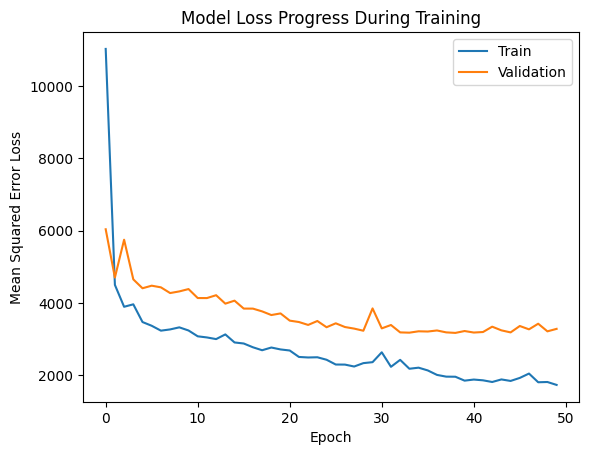

In [18]:
# Plotting training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Progress During Training')
plt.ylabel('Mean Squared Error Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Let's do a demonstration on an image that the model has never seen before... That way, we can truly know if the model works or not!

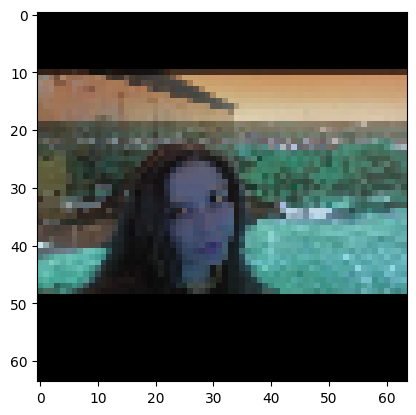

A Selfie of me infront of Rensselaer Polytechnic Institute's EMPAC building...
This photo has 96 likes on my private instagram account as of April 16th, 2024.

1/1 [==============================] - 0s 93ms/step

The model's prediction of this is... [[103.68022]]
The percentage difference between the two numbers is... 8.00023078918457 %


In [19]:
#First, lets load the image!

image = cv2.imread("Data/demo_image.jpg")
target_size = (64, 64)
image = cv2.resize(image, target_size) #resizes image to 64 x 64... this maintains consistency!
plt.imshow(image)
plt.show()

X = []
target_size = (64, 64)
image = cv2.resize(image, target_size) #resizes image
image = np.array(image) #Converts image to an numpy array
X.append(image) #appends it to X
X = np.array(X) #converts X into numpy array

#Normalize the image data
X_normalized = X / 255.0

print("A Selfie of me infront of Rensselaer Polytechnic Institute's EMPAC building...")
print("This photo has 96 likes on my private instagram account as of April 16th, 2024.")
print()

prediction = model.predict(X_normalized)
print()
print("The model's prediction of this is...", prediction)
percent_diff = float(abs(prediction - 96) / 96) * 100.0
print("The percentage difference between the two numbers is...", percent_diff, "%")

Hey, while not perfect, that is still reasonably close! 

## Going forward, some future implications... 

There are plenty of ways to improve the model, but a model is only as good as it's data, so focusing on the data could be a wonderful way to increase the preformance of this model. One (obvious) way on improving the model is to increase the dataset count so that the model has more to learn from, but since my current instagram picture collection is small, it will take some creativity to increase the data generated from it. 

One method is to feed the model a replica of the same exact pictures, but turned 90 degrees to the right. While to us it is the same image, to the model, it is a completely new image to take into account with a different set of pixel strengths relative to the x and y axis. Another method is to increase the number of features that's associated with each image, potentially through more advanced feature vector extraction. For example, measuring the symmetry, the type of image (selfie, pose, etc.), or whether an image has a certain background (nature backdrop, restaurant backdrop, city backdrop, animals in the backdrop, etc.) would allow the model to learn from much more data than the pixel strengths / colors alone! Humans are naturally pleased with symmetry, animals, and other scenic wonders, so it makes sense to take note when estimating the social preformance of these images on social media.

Another method, aside from improving the dataset, is to fine-tune the model, potentially through hyperparameter tuning. Experimenting with diverse CNN architectures and keeping note on what (and what doesn't) work would steer us towards a more robust and sensible model. 

Taking into account these changes would maximize the potential of the model to estimate the social preformance of images on social media. Hopefully, in the future, this project would be improved on!

## Conclusions and Acknowledgements

This project was created for the Rensselaer Polytechnic Institute's Machine Learning Engineering class for Greta Perez-Haiek's undergraduate project. Code was written by Greta Perez-Haiek, and all data rights are associated with Greta Perez-Haiek (est. 2024) for open source use only. 